# Classification and Clustering on HAR Dataset, UCI Machine Learning Repository
Saad Ahmed Bazaz, undergraduate at FAST NUCES

## Pre-requisites:
- Download [HAR dataset](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)
- Extract dataset and place under "datasets" folder in project root

## Imports

In [2]:
import pandas as pd
import numpy as np
import random
import copy
import time
import matplotlib.pyplot as plt

## ----------- Extra -----------
# import library for 3D plotting
from mpl_toolkits import mplot3d

# magic function for interactive plot
%matplotlib notebook


## Load necessary data

In [3]:
base_url = "./datasets/HAR/UCI HAR Dataset/"

In [4]:
activity_labels = pd.read_csv(base_url + "activity_labels.txt",sep=' ',header=None)
print (activity_labels)

   0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
5  6              LAYING


In [5]:
X_train       = pd.read_csv(base_url + "train/X_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
y_train       = pd.read_csv(base_url + "train/y_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
subject_train = pd.read_csv(base_url + "train/subject_train.txt",
                            delim_whitespace=True,
                            header=None
                           )

X_test        = pd.read_csv(base_url + "test/X_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
y_test        = pd.read_csv(base_url + "test/y_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
subject_test  = pd.read_csv(base_url + "test/subject_test.txt",
                            delim_whitespace=True,
                            header=None
                           )

## Examine Data

### Training Set

In [6]:
print ("Training data (X):")
print (X_train)

print ("-------------------------------")

print ("Training data (Y):")
print (y_train)

print ("-------------------------------")

print ("Training data (Subject):")
print (subject_train)

print ("-------------------------------")

Training data (X):
           0         1         2         3         4         5         6    \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.299665 -0.057193 -0.181233 -0.195387  0.039905  0.077078 -0.282301   
7348  0.273853 -0.007749 -0.147468 -0.235309  0.004816  0.059280 -0.322552   
7349  0.273387 -0.017011 -0.045022 -0.218218 -0.103822  0.274533 -0.304515   
7350  0.289654 -0.018843 -0.158281 -0.219139 -0.111412  0.268893 -0.310487   
7351  0.351503 -0.012423 -0.203867 -0.269270 -0.087212  0.177404 -0.377404   

           7         8         9    ...     

### Testing Data

In [7]:
print ("Testing data (X):")
print (X_test)

print ("-------------------------------")

print ("Testing data (Y):")
print (y_test)

print ("-------------------------------")

print ("Testing data (Subject):")
print (subject_test)

print ("-------------------------------")

Testing data (X):
           0         1         2         3         4         5         6    \
0     0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1     0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2     0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3     0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4     0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   
...        ...       ...       ...       ...       ...       ...       ...   
2942  0.310155 -0.053391 -0.099109 -0.287866 -0.140589 -0.215088 -0.356083   
2943  0.363385 -0.039214 -0.105915 -0.305388  0.028148 -0.196373 -0.373540   
2944  0.349966  0.030077 -0.115788 -0.329638 -0.042143 -0.250181 -0.388017   
2945  0.237594  0.018467 -0.096499 -0.323114 -0.229775 -0.207574 -0.392380   
2946  0.153627 -0.018437 -0.137018 -0.330046 -0.195253 -0.164339 -0.430974   

           7         8         9    ...      

### Convert Dataframes to Numpy Arrays
Because speed.

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
## Fix some issues
y_test = np.array([a[0] for a in y_test.astype(float)])

# Simple K Nearest Neighbor
The simplest KNN algorithm would be a brute-force one. No trees, no nothing. Just raw arrays.

In [10]:
def search__knn_simple(input_features, dataset, k):
    
    distances = np.zeros(dataset.shape[0], dtype=object)
    
    for n, row in enumerate(dataset):
        distances[n] = np.linalg.norm(row-input_features)
        # print (distances[n])
        
    similar_rows_indexes = distances.argsort()[:k]
        
    return similar_rows_indexes

In [11]:
def classify__knn_simple(input_features, dataset, labelset, k=5):

    closest_rows = np.zeros(k, dtype=object)
    closest_rows_labels = np.zeros(k, dtype=int)

    closest_rows_indexes = search__knn_simple(input_features, dataset, k)

    for i, index in enumerate(closest_rows_indexes):
        closest_rows[i] = dataset[index]
        closest_rows_labels[i] = labelset[index]

    values, counts = np.unique(closest_rows_labels, return_counts=True)

    ind = np.argmax(counts)
    label = values[ind]  # prints the most frequent element
    
    return label, closest_rows_labels



## Test

### With Random

In [14]:
# Choose a random row
num = random.randint(0, len(X_test))
test__input_row = X_test[num]
test__actual_label = y_test[num]

In [15]:
#Now pass any of test image in the classifier function above and print the predicted class
label, closest_rows_labels = classify__knn_simple(test__input_row, X_train, y_train)

print ("Input row is predicted to belong to Class {}, so we think that this person is {}.".format(label, activity_labels.loc[label-1, 1]))
print ("Other labels it is close to:", closest_rows_labels)

print ("It actually belongs to Class {}. This person is {}.".format(test__actual_label, activity_labels.loc[test__actual_label-1, 1]))


Input row is predicted to belong to Class 2, so we think that this person is WALKING_UPSTAIRS.
Other labels it is close to: [1 2 2 2 2]
It actually belongs to Class 2.0. This person is WALKING_UPSTAIRS.


### With Entire Test Set

In [16]:
## Reduce test set here, if required
# n = 100
# X_test = X_test[:n]

In [17]:
y_pred = np.zeros(X_test.shape[0])
closest_rows_labels_pred = np.zeros(X_test.shape[0], dtype=object)

# log_gen = X_test.shape[0]/3000

try:
    if (tested_test_set == True):
        confirmation = input ("Seems like you've already tested the dataset ({}). Would you like to try again? (Y/n)".format(tested_test_set))
except:
    tested_test_set = True
        
if confirmation == "Y" or confirmation == "y" or tested_test_set == False:
    log_gen = 150

    ts = time.time()
    total_time = 0

    for i, test__input_row in enumerate(X_test):
        # Pass each row in the classifier function above and print the predicted class
        label, closest_rows_labels = classify__knn_simple(test__input_row, X_train, y_train)

        y_pred[i] = label
        closest_rows_labels_pred[i] = closest_rows_labels

        if i % log_gen == 0:
            print ("Progress... Row number #", i)
            new_ts = time.time()
            diff_time = new_ts - ts
            print ("Completed in {} seconds. (avg: {} s per row)".format(diff_time, (diff_time)/log_gen))
            total_time += diff_time
            ts = new_ts

    print ("\n-----------------------\nDone. Total time: {} seconds ({} minutes)".format(total_time, total_time/60))
    tested_test_set = True

Progress... Row number # 0
Completed in 0.31092214584350586 seconds. (avg: 0.0020728143056233726 s per row)
Progress... Row number # 150
Completed in 37.71038508415222 seconds. (avg: 0.25140256722768145 s per row)
Progress... Row number # 300
Completed in 40.01066493988037 seconds. (avg: 0.26673776626586915 s per row)
Progress... Row number # 450
Completed in 40.98476195335388 seconds. (avg: 0.27323174635569253 s per row)
Progress... Row number # 600
Completed in 41.27876901626587 seconds. (avg: 0.27519179344177247 s per row)
Progress... Row number # 750
Completed in 40.661521911621094 seconds. (avg: 0.27107681274414064 s per row)
Progress... Row number # 900
Completed in 36.85724592208862 seconds. (avg: 0.24571497281392415 s per row)
Progress... Row number # 1050
Completed in 38.059401988983154 seconds. (avg: 0.25372934659322105 s per row)
Progress... Row number # 1200
Completed in 36.05020523071289 seconds. (avg: 0.24033470153808595 s per row)
Progress... Row number # 1350
Completed 

In [18]:
print (y_pred)
print (y_test)

[5. 5. 5. ... 2. 2. 1.]
[5. 5. 5. ... 2. 2. 2.]


## Evaluate and visualize results

### Confusion Matrix

In [19]:
y_actu__df = pd.Series(y_test, name='Actual')
y_pred__df = pd.Series(y_pred, name='Predicted')
confusion_matrix = pd.crosstab(y_actu__df, y_pred__df)

In [20]:
print(confusion_matrix)

Predicted  1.0  2.0  3.0  4.0  5.0  6.0
Actual                                 
1.0        485    2    9    0    0    0
2.0         40  424    7    0    0    0
3.0         45   45  330    0    0    0
4.0          0    3    0  389   99    0
5.0          0    0    0   37  495    0
6.0          0    0    0    2    1  534


### Precision and Recall

In [42]:
cm = confusion_matrix.to_numpy()

TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

num_classes = len(np.unique(y_test))
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

print("True positives = ", TP)
print("False positives = ", FP)
print("False negatives = ", FN)
print("True negatives = ", TN)

True positives =  [485 424 330 389 495 534]
False positives =  [ 85  50  16  39 100   0]
False negatives =  [ 11  47  90 102  37   3]
True negatives =  [2366, 2426, 2511, 2417, 2315, 2410]


In [45]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*( (precision*recall) / (precision+recall) )

In [46]:
print ("Precision for each class is", precision)
print ("Average precision is {} %".format(precision.mean()*100))

print ()

print ("Recall for each class is", recall)
print ("Average recall is {} %".format(recall.mean()*100))

print ()

print ("F1 score for each class is", f1_score)
print ("Average F1 score is {} %".format(f1_score.mean()*100))

Precision for each class is [0.85087719 0.89451477 0.95375723 0.9088785  0.83193277 1.        ]
Average precision is 90.6660077355102 %

Recall for each class is [0.97782258 0.90021231 0.78571429 0.79226069 0.93045113 0.99441341]
Average recall is 89.68124014482727 %

F1 score for each class is [0.90994371 0.8973545  0.8616188  0.84657236 0.87843833 0.99719888]
Average F1 score is 89.85210973000696 %


# Simple K-Means Clustering


## Functions

### Assign Clusters

In [48]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datapoints
    k = centroids.shape[0]  # division size
    idx = np.zeros(m) # array to assign the centroid
    
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    idx = np.argmin(distances, axis=0)
    

    return idx


### Compute new centroids

In [49]:
# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    
    centroids = np.zeros((k, n))  #3*4
    '''Return Updated Values of all K centroids'''

    centroids = np.array([X[idx==k].mean(axis=0) for k in range(centroids.shape[0])])

    return centroids        
    

### DB Index

#### Algorithm

In [50]:
# k is number of clusters
# to be implemented without the use of any libraries (from the scratch)

def compute_s(i, x, labels, clusters):
    norm_c= clusters.shape[0]
    s = 0
    for c in clusters:
        s += np.linalg.norm(c - clusters[i])
    return np.divide(s, norm_c)

def compute_Rij(i, j, x, labels, clusters, k):
    Rij = 0.0
    try:
        d = np.linalg.norm(clusters[i]-clusters[j])
        Rij = np.divide(np.add(compute_s(i, x, labels, clusters), compute_s(j, x, labels, clusters)), d)
    except:
        Rij = 0
    return Rij

def compute_R(i, x, labels, clusters, k): 
    list_r = []
    for i in range(k):
        for j in range(k):
            if(i!=j):
                temp = compute_Rij(i, j, x, labels, clusters, k)
                list_r.append(temp)

    return max(list_r)

def compute_DB_index(x, labels, clusters, k):
    sigma_R = 0.0
    for i in range(k):
        sigma_R = np.add(sigma_R, compute_R(i, x, labels, clusters, k))

    DB_index = np.divide(float(sigma_R), float(k))
    return DB_index


## Full algorithm
Cluster assignment and re-computing centroids.

In [51]:
def run_k_means(X, initial_centroids, max_iters, step_log=None):
    
    if step_log == None:
        step_log = max_iters/100
    
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    
    ts = time.time()
    total_time = 0    
    
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        # update centroids
        centroids = compute_centroids(X, idx, k)
        
        if i % step_log == 0:
            print ("Progress... Epoch number #", i)
            new_ts = time.time()
            diff_time = new_ts - ts
            print ("Completed in {} seconds. (avg: {} s per iteration)".format(diff_time, (diff_time)/log_gen))
            total_time += diff_time
            ts = new_ts            
    print ("\n-----------------------\nDone. Total time: {} seconds ({} minutes)".format(total_time, total_time/60))    
    
    return idx, centroids
 

## 2-Dimensional

In [54]:
X=X_train
np.random.shuffle(X)
cluster1 = X[0:500,:]
cluster2 = X[500:1000,:]
cluster3 = X[1000:1500,:]

In [55]:
k=3
initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
# Select k=3 , pick 3 random centroids from data
idx, centroids = run_k_means(X, initial_centroids, 500, step_log=50) # use 1000 iterations to perform clustering

Progress... Epoch number # 0
Completed in 0.2057490348815918 seconds. (avg: 0.0013716602325439453 s per iteration)
Progress... Epoch number # 50
Completed in 4.858968734741211 seconds. (avg: 0.03239312489827474 s per iteration)
Progress... Epoch number # 100
Completed in 4.483460187911987 seconds. (avg: 0.029889734586079915 s per iteration)
Progress... Epoch number # 150
Completed in 4.68994402885437 seconds. (avg: 0.0312662935256958 s per iteration)
Progress... Epoch number # 200
Completed in 6.0132269859313965 seconds. (avg: 0.04008817990620931 s per iteration)
Progress... Epoch number # 250
Completed in 8.019745826721191 seconds. (avg: 0.05346497217814128 s per iteration)
Progress... Epoch number # 300
Completed in 7.163779973983765 seconds. (avg: 0.047758533159891765 s per iteration)
Progress... Epoch number # 350
Completed in 5.182506084442139 seconds. (avg: 0.03455004056294759 s per iteration)
Progress... Epoch number # 400
Completed in 5.0484459400177 seconds. (avg: 0.0336563062

### Test clusters using DB Index
DB Index:
- Calculates intra cluster sparsity
- Calculates inter cluster sparsity

The minimum DB index after some variations of k will reveal the most optimum k.

In [56]:
# Find optimum DB Index value (min value)

k_to_test = [3, 6, 9]
db_index__results = np.zeros(len(k_to_test))

for i, k in enumerate(k_to_test):
    idx, centroids = run_k_means(X, initial_centroids, 500, step_log=100) # use 500 iterations to perform quick clustering
    index_db_val = compute_DB_index(X, y_train, centroids, k)
    print ("Davies Bouldin index of K-Means cluster of size {} is {}".format(k, index_db_val))

    db_index__results[i] = index_db_val
    
minimum_db_index = db_index__results.argmin()
print (minimum_db_index)
print ("Minimum value of DB Index is {}, hence most optimum k is {}".format(db_index__results[minimum_db_index], k_to_test[minimum_db_index]))
    

Progress... Epoch number # 0
Completed in 0.11320805549621582 seconds. (avg: 0.0007547203699747721 s per iteration)
Progress... Epoch number # 100
Completed in 10.64536190032959 seconds. (avg: 0.0709690793355306 s per iteration)
Progress... Epoch number # 200
Completed in 10.609323024749756 seconds. (avg: 0.07072882016499837 s per iteration)
Progress... Epoch number # 300
Completed in 10.7969651222229 seconds. (avg: 0.071979767481486 s per iteration)
Progress... Epoch number # 400
Completed in 10.25913691520691 seconds. (avg: 0.0683942461013794 s per iteration)

-----------------------
Done. Total time: 42.42399501800537 seconds (0.7070665836334229 minutes)
Davies Bouldin index of K-Means cluster of size 3 is 2.3849173437456606
Progress... Epoch number # 0
Completed in 0.08636283874511719 seconds. (avg: 0.0005757522583007813 s per iteration)
Progress... Epoch number # 100
Completed in 11.034632205963135 seconds. (avg: 0.0735642147064209 s per iteration)
Progress... Epoch number # 200
C

### Visualize

#### 2D plot

In [64]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

<IPython.core.display.Javascript object>


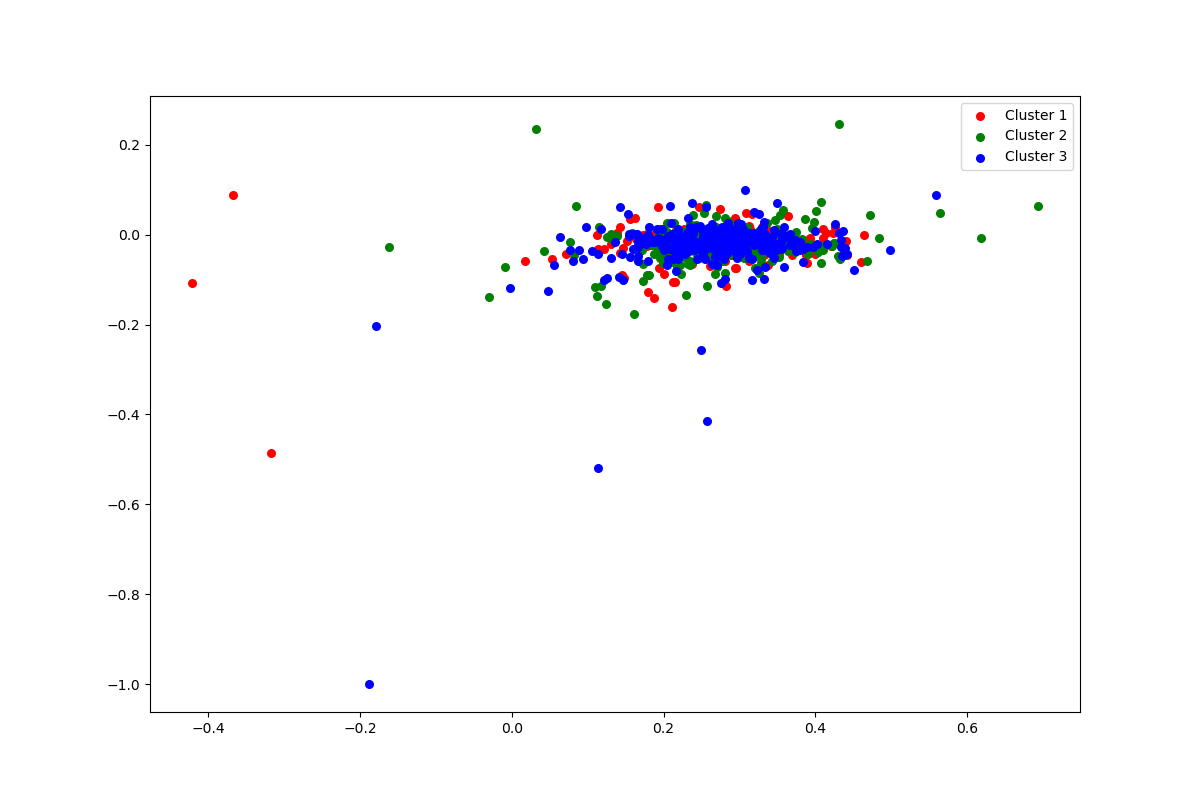

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

<IPython.core.display.Javascript object>


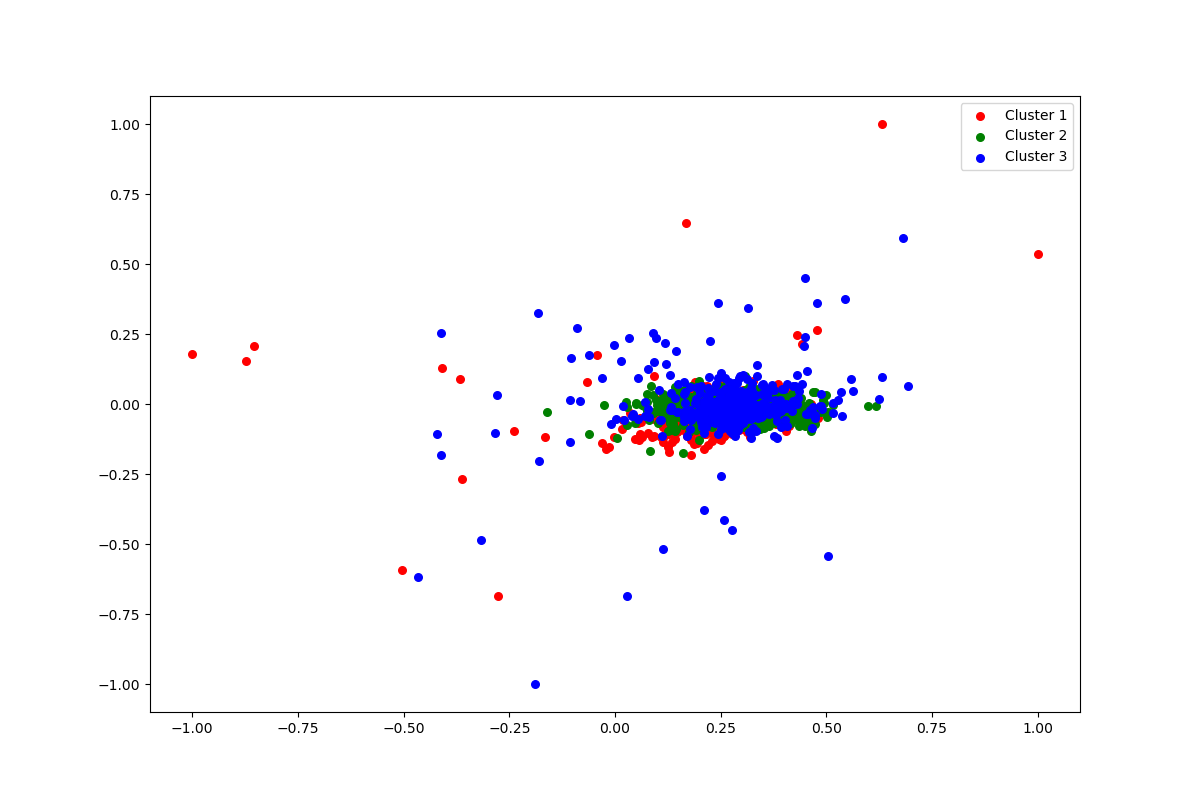

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

#### 3D plot

References: 
- https://www.kaggle.com/timi01/k-means-clustering-and-3d-plotting

<IPython.core.display.Javascript object>


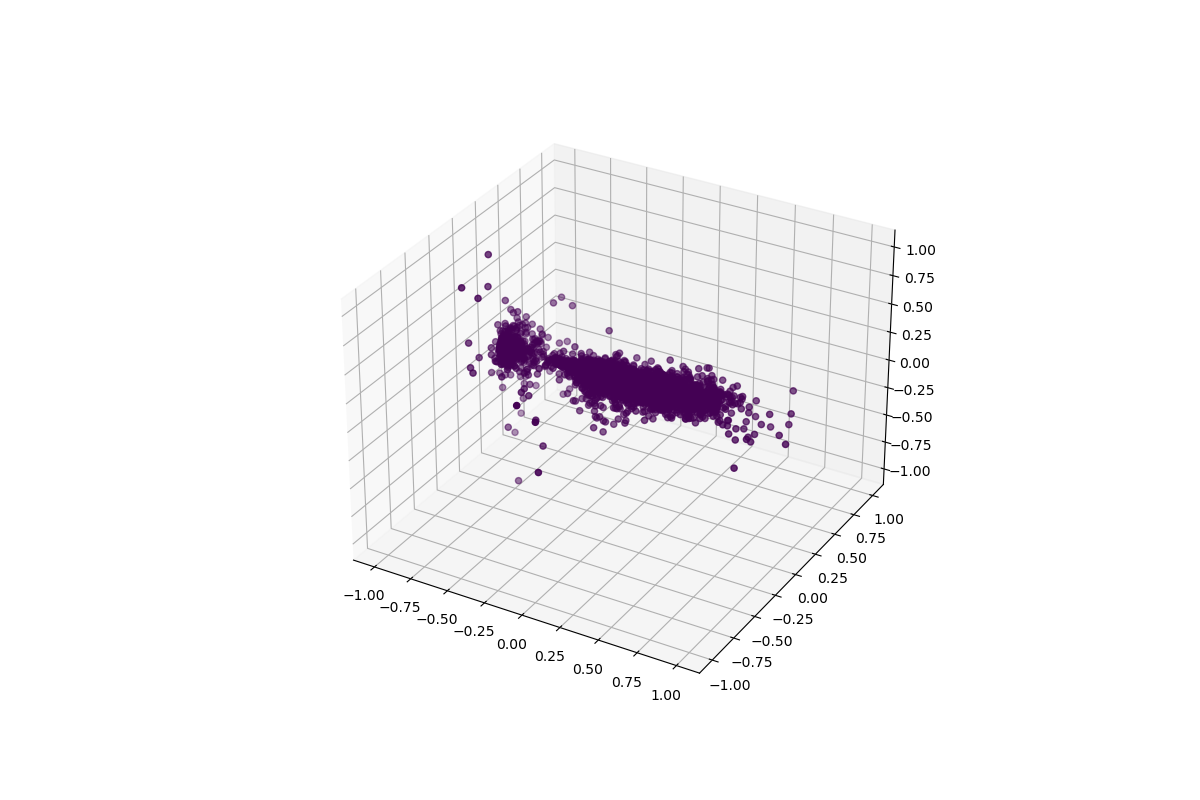

In [67]:
fig, ax_3d = plt.subplots(figsize=(12,8))

y = np.zeros(X.shape[0])

ax_3d= plt.axes(projection = '3d')
ax_3d.scatter(X[:,3],X[:,0],X[:,2],c=y);

plt.show()

## 3-Dimensional

### Load necessary data

#### Training data

In [68]:
body_acc_x_train       = pd.read_csv(base_url + "train/Inertial Signals/body_acc_x_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_acc_y_train       = pd.read_csv(base_url + "train/Inertial Signals/body_acc_y_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_acc_z_train       = pd.read_csv(base_url + "train/Inertial Signals/body_acc_z_train.txt",
                            delim_whitespace=True,
                            header=None
                           )



body_gyro_x_train       = pd.read_csv(base_url + "train/Inertial Signals/body_gyro_x_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_gyro_y_train       = pd.read_csv(base_url + "train/Inertial Signals/body_gyro_y_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_gyro_z_train       = pd.read_csv(base_url + "train/Inertial Signals/body_gyro_z_train.txt",
                            delim_whitespace=True,
                            header=None
                           )


total_acc_x_train       = pd.read_csv(base_url + "train/Inertial Signals/total_acc_x_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
total_acc_y_train       = pd.read_csv(base_url + "train/Inertial Signals/total_acc_y_train.txt",
                            delim_whitespace=True,
                            header=None
                           )
total_acc_z_train       = pd.read_csv(base_url + "train/Inertial Signals/total_acc_z_train.txt",
                            delim_whitespace=True,
                            header=None
                           )

#### Testing data

In [69]:
body_acc_x_test       = pd.read_csv(base_url + "test/Inertial Signals/body_acc_x_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_acc_y_test       = pd.read_csv(base_url + "test/Inertial Signals/body_acc_y_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_acc_z_test       = pd.read_csv(base_url + "test/Inertial Signals/body_acc_z_test.txt",
                            delim_whitespace=True,
                            header=None
                           )



body_gyro_x_test       = pd.read_csv(base_url + "test/Inertial Signals/body_gyro_x_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_gyro_y_test       = pd.read_csv(base_url + "test/Inertial Signals/body_gyro_y_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
body_gyro_z_test       = pd.read_csv(base_url + "test/Inertial Signals/body_gyro_z_test.txt",
                            delim_whitespace=True,
                            header=None
                           )


total_acc_x_test       = pd.read_csv(base_url + "test/Inertial Signals/total_acc_x_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
total_acc_y_test       = pd.read_csv(base_url + "test/Inertial Signals/total_acc_y_test.txt",
                            delim_whitespace=True,
                            header=None
                           )
total_acc_z_test       = pd.read_csv(base_url + "test/Inertial Signals/total_acc_z_test.txt",
                            delim_whitespace=True,
                            header=None
                           )

### Examine Data

In [70]:
print (body_acc_x_train)
print (body_acc_y_train)
print (body_acc_z_train)

           0         1         2         3         4         5         6    \
0     0.000181  0.010139  0.009276  0.005066  0.010810  0.004045  0.004757   
1     0.001094  0.004550  0.002879  0.002247  0.003305  0.002416  0.001619   
2     0.003531  0.002285 -0.000420 -0.003738 -0.006706 -0.003148  0.000733   
3    -0.001772 -0.001311  0.000388  0.000408 -0.000355  0.000998  0.001109   
4     0.000087 -0.000272  0.001022  0.003126  0.002284  0.000885  0.001933   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.388873  0.618763  0.774067  0.586568  0.217007 -0.027330 -0.171294   
7348  0.711864  0.709237  0.321368 -0.028921 -0.208107 -0.192802 -0.066754   
7349 -0.226717 -0.177817 -0.150869 -0.132237 -0.068338  0.007874  0.096481   
7350 -0.064806 -0.079933 -0.068350 -0.038477 -0.028679  0.018335  0.077571   
7351 -0.194471 -0.173802 -0.127545 -0.108369 -0.121152 -0.074004 -0.002135   

           7         8         9    ...       118       119    

In [71]:
body_acc_x_train  = body_acc_x_train.to_numpy()
body_acc_y_train  = body_acc_y_train.to_numpy()
body_acc_z_train  = body_acc_z_train.to_numpy()
body_gyro_x_train = body_gyro_x_train.to_numpy()
body_gyro_y_train = body_gyro_y_train.to_numpy()
body_gyro_z_train = body_gyro_z_train.to_numpy()
total_acc_x_train = total_acc_x_train.to_numpy()
total_acc_y_train = total_acc_y_train.to_numpy()
total_acc_z_train = total_acc_z_train.to_numpy()

body_acc_x_test  = body_acc_x_test.to_numpy()
body_acc_y_test  = body_acc_y_test.to_numpy()
body_acc_z_test  = body_acc_z_test.to_numpy()
body_gyro_x_test = body_gyro_x_test.to_numpy()
body_gyro_y_test = body_gyro_y_test.to_numpy()
body_gyro_z_test = body_gyro_z_test.to_numpy()
total_acc_x_test = total_acc_x_test.to_numpy()
total_acc_y_test = total_acc_y_test.to_numpy()
total_acc_z_test = total_acc_z_test.to_numpy()

In [73]:
print (body_acc_x_train.shape)
print (body_acc_x_train)

(7352, 128)
[[ 1.808515e-04  1.013856e-02  9.275574e-03 ... -1.147484e-03
  -2.222655e-04  1.575500e-03]
 [ 1.093752e-03  4.550077e-03  2.879173e-03 ... -4.646144e-03
  -2.941333e-03 -1.598751e-03]
 [ 3.531266e-03  2.285063e-03 -4.197538e-04 ...  1.245999e-03
   3.116783e-03  2.177658e-03]
 ...
 [-2.267175e-01 -1.778169e-01 -1.508691e-01 ... -2.949353e-01
  -2.434030e-01 -2.152148e-01]
 [-6.480597e-02 -7.993300e-02 -6.834966e-02 ... -3.150159e-01
  -3.307374e-01 -2.723475e-01]
 [-1.944707e-01 -1.738025e-01 -1.275446e-01 ... -7.190685e-02
  -1.422088e-01 -1.709989e-01]]


### Reduce dimensions to fit into 3

#### Simple Mean
Right now, each feature vector contains around 128 features. These are too many dimensions for us, specially for 3D. Calculate the mean of each feature vector and replace the 128 values.

In [74]:
## Easy way to reduce it (for now) is to take mean of the nested arrays
body_acc_x_train__reduced = np.array ([a.mean() for a in body_acc_x_train]) 
body_acc_y_train__reduced = np.array ([a.mean() for a in body_acc_y_train]) 
body_acc_z_train__reduced = np.array ([a.mean() for a in body_acc_z_train]) 

#### (Alternative) PCA
PCA is a technique used to decrease dimensions of a vector, using transformations.

References:
- https://www.python-engineer.com/courses/mlfromscratch/11_pca/
- https://stackoverflow.com/questions/51991569/how-can-i-specify-the-color-of-the-kmeans-clusters-in-3d-plot-pandas

In [75]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [76]:
pca_ = PCA(n_components=1)
pca_.fit(body_acc_x_train)
body_acc_x_train__reduced = pca_.transform(body_acc_x_train)
# Fix weird 2D array issue
body_acc_x_train__reduced = np.array([a[0] for a in body_acc_x_train__reduced])

pca_ = PCA(n_components=1)
pca_.fit(body_acc_y_train)
body_acc_y_train__reduced = pca_.transform(body_acc_y_train)
body_acc_y_train__reduced = np.array([a[0] for a in body_acc_y_train__reduced])


pca_ = PCA(n_components=1)
pca_.fit(body_acc_z_train)
body_acc_z_train__reduced = pca_.transform(body_acc_z_train)
body_acc_z_train__reduced = np.array([a[0] for a in body_acc_z_train__reduced])

In [77]:
print (body_acc_x_train__reduced)

[ 0.01585536  0.02136865  0.02399326 ... -0.06524586  0.21885711
 -0.2626943 ]


In [78]:
# body_acc_xyz_train = pd.DataFrame(np.array([body_acc_x_train.flatten(), body_acc_y_train.flatten(), body_acc_z_train.flatten()], dtype=object))
body_acc_xyz_train__reduced = pd.DataFrame(np.array([body_acc_x_train__reduced, body_acc_y_train__reduced, body_acc_z_train__reduced], dtype=object))

In [79]:
# print (body_acc_xyz_train)
print (body_acc_xyz_train__reduced.T)

              0           1          2
0     0.0158554  -0.0160053   0.043299
1     0.0213687  0.00154756  -0.056627
2     0.0239933   0.0117165 -0.0570727
3     0.0221998  -0.0132983 -0.0267923
4     0.0179792 -0.00613437 -0.0270869
...         ...         ...        ...
7347  -0.623559    0.391544     1.4135
7348   0.289782    -0.60539    1.42673
7349 -0.0652459   -0.532147    1.91914
7350   0.218857   -0.562986    2.05942
7351  -0.262694  -0.0252744    1.31376

[7352 rows x 3 columns]


In [80]:
body_acc_xyz_train__reduced__transposed__numpy = body_acc_xyz_train__reduced.T.to_numpy()
print (body_acc_xyz_train__reduced__transposed__numpy)

[[0.015855361127439238 -0.01600533923105023 0.04329896761884908]
 [0.021368654495415945 0.0015475551343729578 -0.05662699841905956]
 [0.0239932588257522 0.011716474546215739 -0.05707265901291504]
 ...
 [-0.0652458618332858 -0.532146914690851 1.9191385453143925]
 [0.21885710767012495 -0.5629857246944046 2.059417773788781]
 [-0.2626942955746702 -0.02527439918105556 1.3137600956043864]]


## Explanation of what's boutta go down
The above is the raw data from sensors. These are one-to-one mapped with the train/test data of earlier data.

It's 3D data that means it's in the X, Y and Z planes. Now we will let the Kmeans cluster these itself, without any help from the classes. If the clustering works correctly, each cluster should map to exactly one label. 

In [81]:
X = body_acc_xyz_train__reduced__transposed__numpy

np.random.shuffle(X)

cluster1 = X[0:500,:]
cluster2 = X[500:1000,:]
cluster3 = X[1000:1500,:]
cluster4 = X[1500:2000,:]
cluster5 = X[2000:2500,:]
cluster6 = X[2500:2900,:]

In [82]:
def pick_k_random_centroids(dataset_x, dataset_y, dataset_z, k=6):
    initial_centroids = np.zeros(k, dtype=object)
    for i in range(k):
        initial_centroids[i] = (
                               dataset_x[random.randint(0,50)], 
                               dataset_y[random.randint(50,100)], 
                               dataset_z[random.randint(100,150)]
        )
    return initial_centroids

In [83]:
initial_centroids__3d = np.array([ 
    X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)],
    X[random.randint(150,200)], X[random.randint(200,250)], X[random.randint(300,350)],
])

print (initial_centroids__3d.shape)
print (X.shape)
# Select k=6 , pick 6 random centroids from data
idx__3d, centroids__3d = run_k_means(X.astype(float), initial_centroids__3d.astype(float), 5000, step_log=500)# use 1000 iterations to perform clustering

(6, 3)
(7352, 3)
Progress... Epoch number # 0
Completed in 0.006682157516479492 seconds. (avg: 4.454771677652995e-05 s per iteration)
Progress... Epoch number # 500
Completed in 1.0331850051879883 seconds. (avg: 0.0068879000345865886 s per iteration)
Progress... Epoch number # 1000
Completed in 0.831352710723877 seconds. (avg: 0.0055423514048258465 s per iteration)
Progress... Epoch number # 1500
Completed in 0.8102071285247803 seconds. (avg: 0.005401380856831868 s per iteration)
Progress... Epoch number # 2000
Completed in 0.7924251556396484 seconds. (avg: 0.005282834370930989 s per iteration)
Progress... Epoch number # 2500
Completed in 0.7953107357025146 seconds. (avg: 0.005302071571350098 s per iteration)
Progress... Epoch number # 3000
Completed in 0.7971489429473877 seconds. (avg: 0.005314326286315918 s per iteration)
Progress... Epoch number # 3500
Completed in 0.7897982597351074 seconds. (avg: 0.005265321731567383 s per iteration)
Progress... Epoch number # 4000
Completed in 0.

In [84]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]
k_Meancluster4 = X[np.where(idx == 3)[0],:]
k_Meancluster5 = X[np.where(idx == 4)[0],:]
k_Meancluster6 = X[np.where(idx == 5)[0],:]

<IPython.core.display.Javascript object>


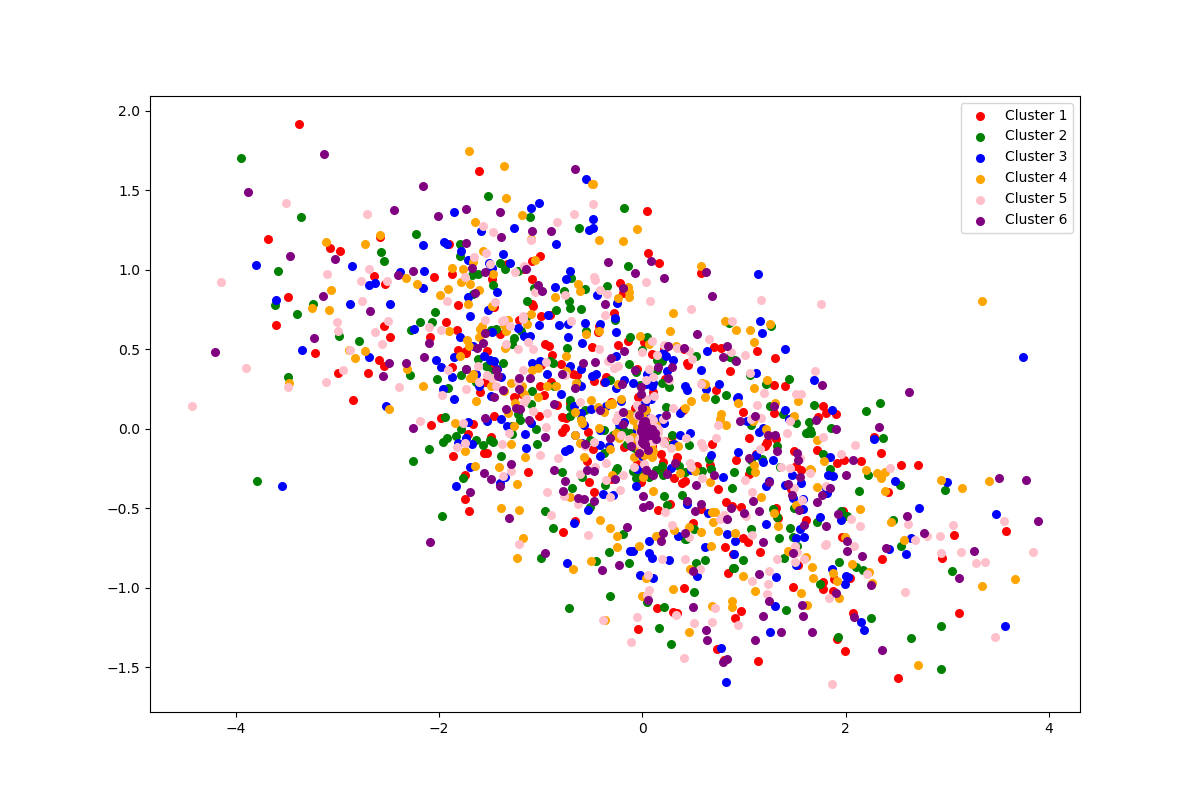

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='red', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='green', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='blue', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='orange', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='pink', label='Cluster 5')
ax.scatter(cluster6[:,0], cluster6[:,1], s=30, color='purple', label='Cluster 6')

ax.legend()

<IPython.core.display.Javascript object>


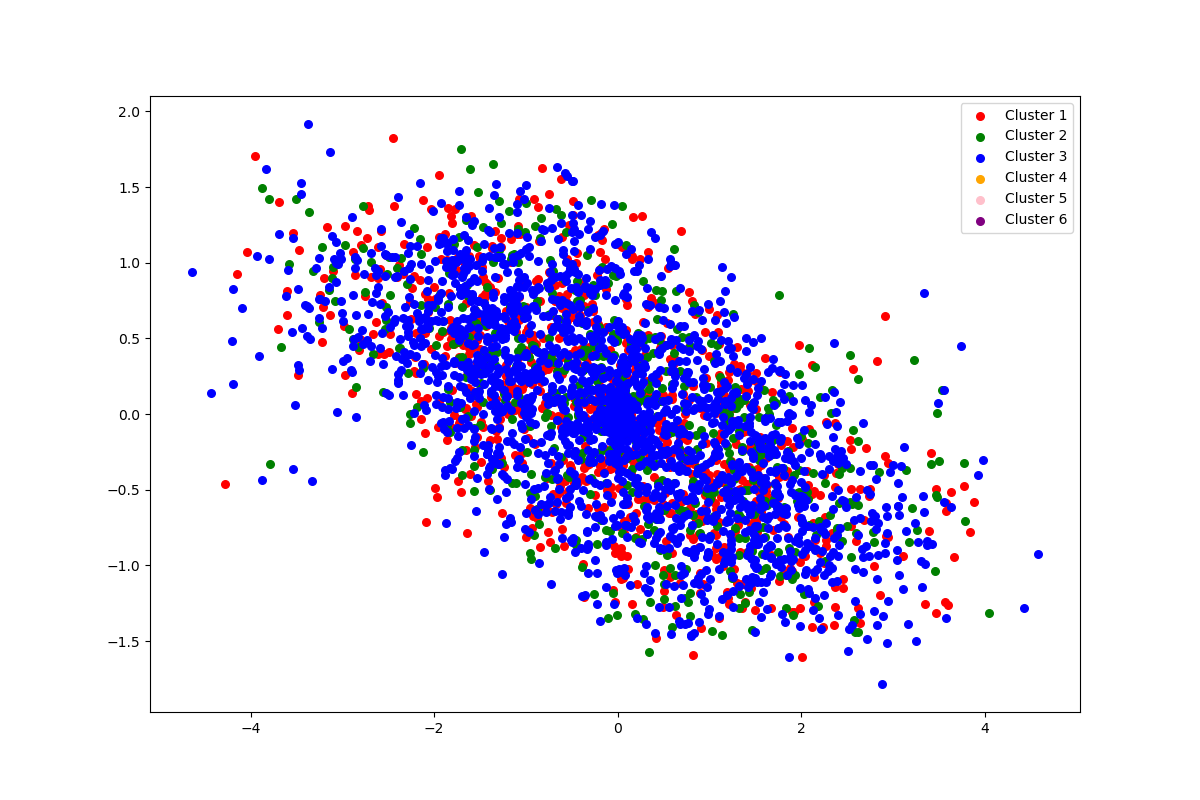

In [89]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='red', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='green', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='blue', label='Cluster 3')
ax.scatter(k_Meancluster4[:,0], k_Meancluster4[:,1], s=30, color='orange', label='Cluster 4')
ax.scatter(k_Meancluster5[:,0], k_Meancluster5[:,1], s=30, color='pink', label='Cluster 5')
ax.scatter(k_Meancluster6[:,0], k_Meancluster6[:,1], s=30, color='purple', label='Cluster 6')

ax.legend()

<IPython.core.display.Javascript object>


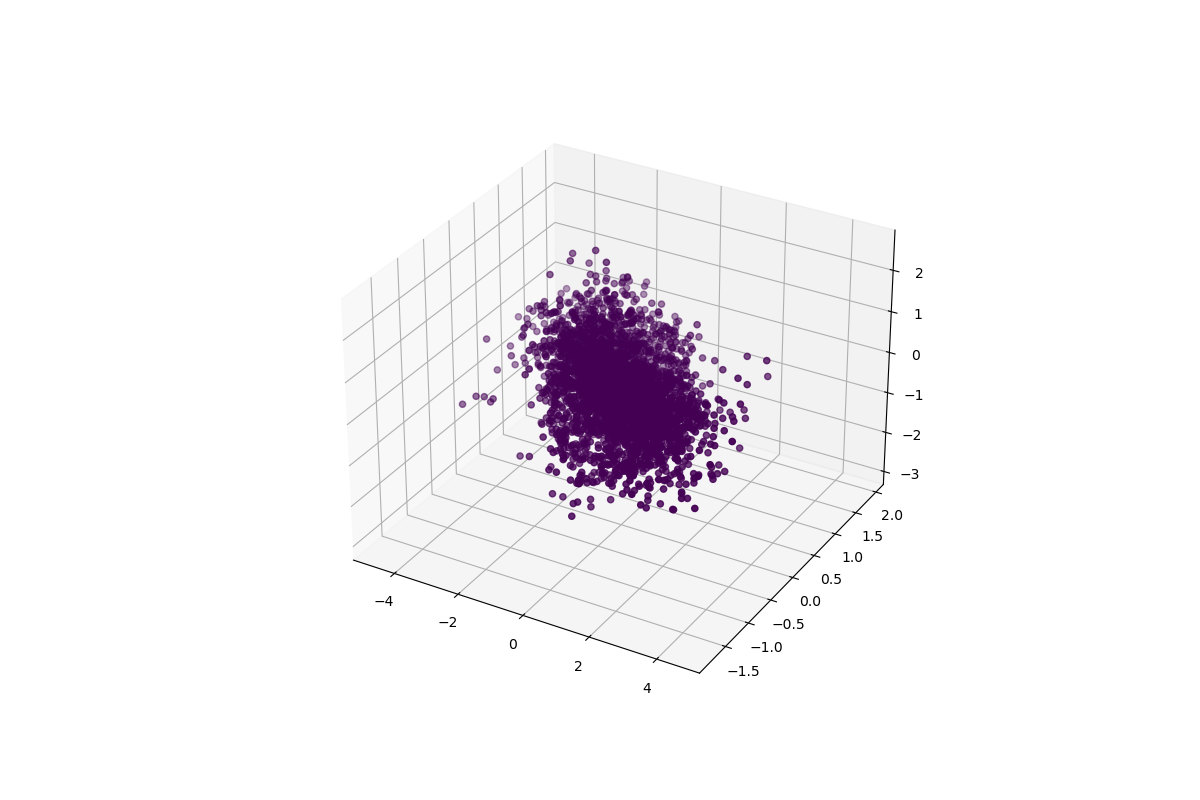

In [90]:
fig, ax_3d = plt.subplots(figsize=(12,8))

y = np.zeros(X.shape[0])

ax_3d= plt.axes(projection = '3d')
ax_3d.scatter(X[:,0],X[:,1],X[:,2],c=y)

plt.show()

<IPython.core.display.Javascript object>


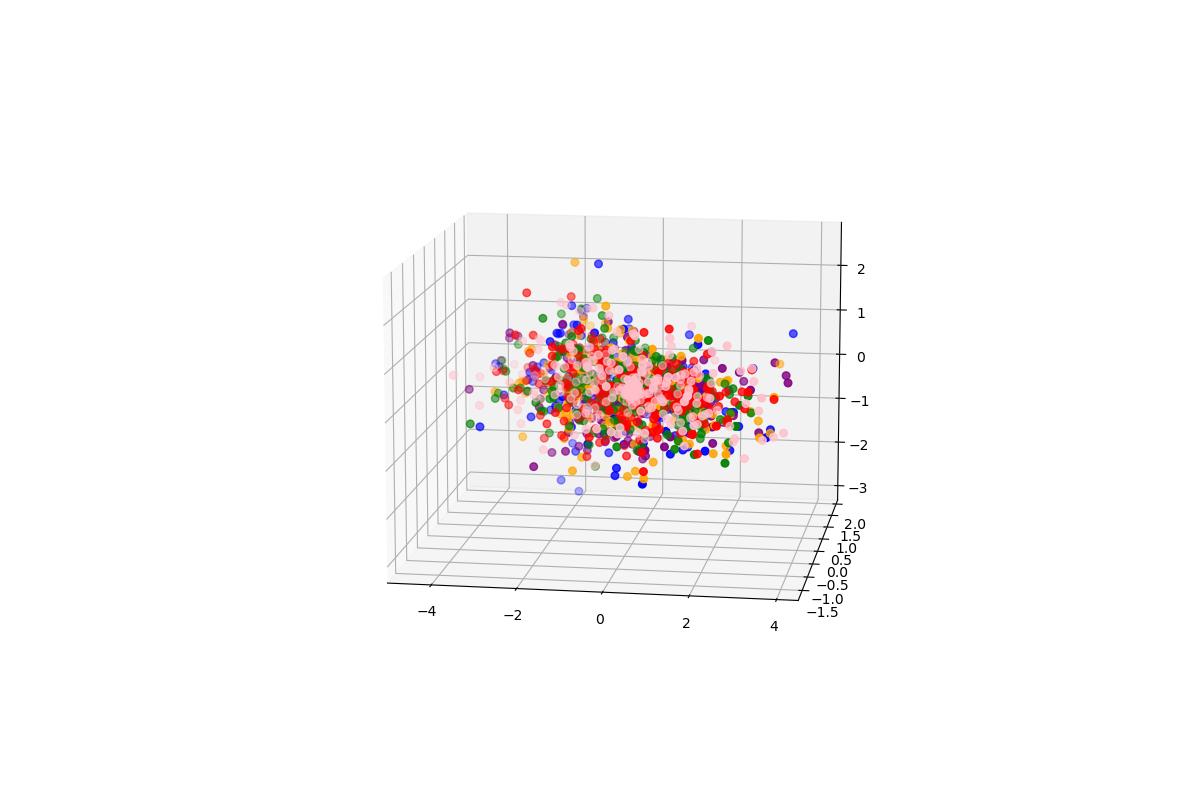

In [91]:
fig, ax_3d = plt.subplots(figsize=(12,8))

ax_3d= plt.axes(projection = '3d')
ax_3d.scatter(cluster1[:,0], cluster1[:,1], cluster1[:,2], s=30, color='red', label='Cluster 1')
ax_3d.scatter(cluster2[:,0], cluster2[:,1], cluster2[:,2], s=30, color='green', label='Cluster 2')
ax_3d.scatter(cluster3[:,0], cluster3[:,1], cluster3[:,2], s=30, color='blue', label='Cluster 3')
ax_3d.scatter(cluster4[:,0], cluster4[:,1], cluster4[:,2], s=30, color='orange', label='Cluster 4')
ax_3d.scatter(cluster5[:,0], cluster5[:,1], cluster5[:,2], s=30, color='pink', label='Cluster 5')
ax_3d.scatter(cluster6[:,0], cluster6[:,1], cluster6[:,2], s=30, color='purple', label='Cluster 6')
plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()